# Problem 6.7
### Consider pricing a European call option on an underlying stock with current price S(0) = 50, strike price K = 52, and volatility σ = 0.5. Suppose that there are N = 30 days to maturity and that the risk-free rate of return is r = 0.05.

### (a) Confirm that the fair price for this option is 2.10 when the payoff is based on S(30) [i.e., a standard option with payoff as in (6.74)].

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

S_0 = 50
K = 52
sigma = 0.5
r = 0.05
T = 30
n = 1000
m = 100

mu_euro = np.zeros((m,1))
for j in range(m):
    Z = norm.rvs(size=n)
    S_t = S_0*np.exp(((r-(sigma**2)/2)*(T/365))+(sigma*Z*np.sqrt(T/365)))
    C = np.zeros((n,1))
    for i in range(n):
        C[i] = (np.exp(-r*(T/365))*max(0,S_t[i]-K))
    mu_euro[j] = np.mean(C)
mu_hat = np.mean(mu_euro)

print("Fair Price:",mu_hat)

Fair Price: 2.115673480310294


### (b) Consider the analogous Asian option (same S(0), K, σ, N, and r) with payoff based on the arithmetic mean stock price during the holding period, as in (6.77). Using simple Monte Carlo, estimate the fair price for this option.

Estimated mu: 0.892717067567073
Estimated theta: 0.8330172374621587
Estimated standard deviation: 0.05307804100731948


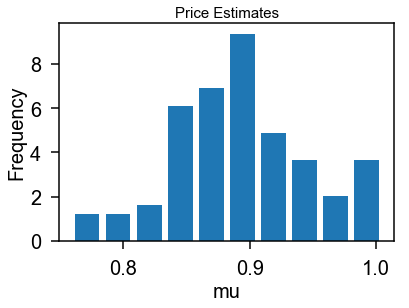

In [3]:
mu_monte_carlo = []
theta_monte_carlo = []
for j in range(m):
    A = []
    theta = []
    for i in range(n):
        S_t = [S_0]
        for k in range(1,T):
            S_t.append(S_t[k-1]*np.exp(((r-(sigma**2)/2)/365)+(sigma*norm.rvs(size=1))/np.sqrt(365)))
        A.append(np.exp((-r*T)/365)*max(0,np.mean(S_t[1:k])-K))
        theta.append(np.exp(-r*T/365)*max(0,np.exp(np.mean(np.log(S_t))) - K))
    mu_monte_carlo.append(np.mean(A)) # the averaging is the simple monte carlo step
    theta_monte_carlo.append(np.mean(theta))
    
#histogram of mu_monte_carlo
plt.figure()
plt.hist(mu_monte_carlo, density=True,rwidth=0.8)
plt.title("Price Estimates",fontsize=15)
plt.xlabel('mu',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
    
print("Estimated mu:",np.mean(mu_monte_carlo))
print("Estimated theta:",np.mean(theta_monte_carlo))
print("Estimated standard deviation:",np.std(mu_monte_carlo))
plt.show()

### (c) Improve upon the estimate in (b) using the control variate strategy described in Example 6.13.

Mean for Ordinary Approach: 0.892717067567073
Mean for Control Variate Approach: 0.9693792324027917
Standard Deviation for Ordinary Approach: 0.05307804100731948
Standard Deviation for Control Variate Approach: 0.003895837598152479


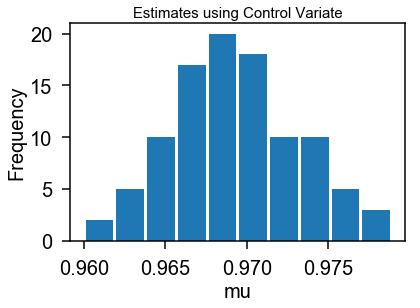

In [10]:
# define constants given in book
S_0 = 50
K = 52
sigma = 0.5
r = 0.05
T = 30
n = 1000
m = 100

c3 = 1 + (1/T)
a = c3*T
b = 1/(2*T)
d = 1 + b
e = (a/1095)*d
g = e**(1/2)
c2 = sigma*g
c1 = (1/c2)*((np.log(S_0/K) + ((c3*T/730)*(r - (sigma**2)/2)) + ((c3*(sigma**2)*T)/1095)*(1 + 1/(2*T))))
the = (S_0*norm.cdf(c1)*np.exp(-T*(r + (c3*(sigma**2)/6))*(1 - (1/T))/730)) - (K*norm.cdf(c1-c2)*np.exp(-r*(T/365)))
    
# calculate control variate
mu_control_var = mu_monte_carlo-(theta_monte_carlo-the)
#histogram mu_control_var
plt.figure()
plt.hist(mu_control_var,rwidth=0.9)
plt.title("Estimates using Control Variate",fontsize=15)
plt.xlabel('mu',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

print("Mean for Ordinary Approach:",np.mean(mu_monte_carlo))
print("Mean for Control Variate Approach:",np.mean(mu_control_var))
print("Standard Deviation for Ordinary Approach:",np.std(mu_monte_carlo))
print("Standard Deviation for Control Variate Approach:",np.std(mu_control_var))
plt.show()

### (d) Try an antithetic approach to estimate the fair price for the option described in part (b).

Estimated mu: 0.8869017817361449
Estimated standard deviation: 0.08101032458686425


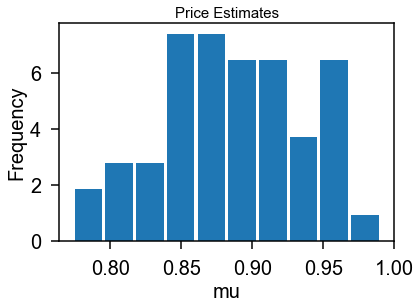

In [9]:
n = 1000
m = 100
mu_mc_anti1 = []
mu_mc_anti2 = []
theta_mc_anti1 = []
theta_mc_anti2 = []

for j in range(m):
    A1 = []
    A2 = []
    theta1 = []
    theta2 = []
    for i in range(n):
        S_t1 = [S_0]
        S_t2 = [S_0]
        for k in range(1,T):
            z = norm.rvs(size=1)
            S_t1.append(S_t1[k-1]*np.exp(((r-(sigma**2)/2)/365)+(sigma*z)/np.sqrt(365)))
            S_t2.append(S_t2[k-1]*np.exp(((r-(sigma**2)/2)/365)+(sigma*(-z))/np.sqrt(365)))
        A1.append(np.exp((-r*T)/365)*max(0,np.mean(S_t1[1:k])-K))
        A2.append(np.exp((-r*T)/365)*max(0,np.mean(S_t2[1:k])-K))
        theta1.append(np.exp(-r*T/365)*max(0,np.exp(np.mean(np.log(S_t1))) - K))
        theta2.append(np.exp(-r*T/365)*max(0,np.exp(np.mean(np.log(S_t2))) - K))
    mu_mc_anti1.append(np.mean(A1)) # the averaging is the simple monte carlo step
    mu_mc_anti2.append(np.mean(A2))
    theta_mc_anti1.append(np.mean(theta1))
    theta_mc_anti2.append(np.mean(theta2))

#histogram of mu_monte_carlo
plotting = (np.array(mu_mc_anti1)+np.array(mu_mc_anti2))/2
plt.figure()
plt.hist(plotting, density=True,rwidth=0.9)
plt.title("Price Estimates",fontsize=15)
plt.xlabel('mu',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

print("Estimated mu:",0.5*(np.mean(mu_mc_anti1)+np.mean(mu_mc_anti2)))
print("Estimated standard deviation:",0.5*(np.std(mu_mc_anti1)+np.std(mu_mc_anti2)))
plt.show()

### (e) Using simulation and/or analysis, compare the sampling distributions of the estimators in (b), (c), and (d).

All 3 sampling distributions seem to have a similar mean ((b) gives 0.89, (c) gives around 0.96, and (d) gives 0.88) and all of them seem to have a similar looking histogram. (c) definitely has larger values in it but that's okay since both (b) and (d) have ranges that span over (c)'s range. Where the methods differ is in the standard deviation of the estimates. (b) which uses the simple Monte Carlo method gives a standard deviation of 0.05, (c) which uses the control variate approach gives a standard deviation of 0.003 and (d), which uses the antithetic approach, gives a standard deviation of 0.08. This tells us that it's possible that the control variate approach isn't quite as accurate as the other two but that it will lower the variance between all your values and get you closer to a true estimate. 

# Problem 6.8

### Consider the model given by X~Lognormal(0,1) and log(Y) = 9+3log(X) + epsilon, where epsilon~N(0,1). We wish to estimate E[Y/X]. Compare the performance of the standard Monte Carlo estimator and the Rao-Blackwellized estimator.  

Estimated mu with Monte Carlo: 98678.64165405328
Estimated standard deviation with Monte Carlo: 470.3339878896813


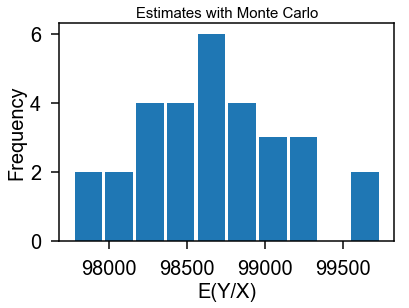

In [2]:
# Standard Monte Carlo
from scipy.stats import lognorm
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n = 10000000
m = 30
mc_est = []
rb_est = []

# 30 trials of 10000000 numbers
for i in range(m):
    x = lognorm.rvs(s=1,scale=1,size=n)
    epsilon = norm.rvs(size=n)
    y = np.exp(9+(3*np.log(x))+epsilon)
    mc_est.append(np.mean(y/x))
    
# Now averaging the 30 trials that we did
mc_mu = np.mean(mc_est)
print("Estimated mu with Monte Carlo:",mc_mu)
mc_sd = np.std(mc_est)
print("Estimated standard deviation with Monte Carlo:",mc_sd)

plt.figure()
plt.hist(mc_est,rwidth=0.9)
plt.title("Estimates with Monte Carlo",fontsize=15)
plt.xlabel('E(Y/X)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.show()

Estimated mu with Rao Blackwellization: 98631.3206107355
Estimated standard deviation with Rao Blackwellization: 262.7082034588506


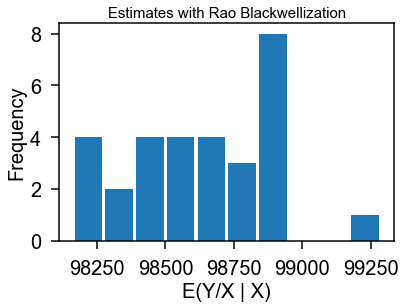

In [3]:
# Rao Blackwellization

for i in range(m):
    x = lognorm.rvs(s=1, size=n) 
    epsilon = norm.rvs(size=n)
    mean = np.mean(np.exp(epsilon)) 
    value = np.exp(9)*(x**2)*mean
    rb_est.append(np.mean(value))

rb_mu = np.mean(rb_est)
print("Estimated mu with Rao Blackwellization:",rb_mu)
rb_sd = np.std(rb_est)
print("Estimated standard deviation with Rao Blackwellization:",rb_sd)

plt.figure()
plt.hist(rb_est,rwidth=0.9)
plt.title("Estimates with Rao Blackwellization",fontsize=15)
plt.xlabel('E(Y/X | X)',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.show()